# Análisis datos Airbnb Seattle


## Fase I. Business Understanding. Definición de necesidades del cliente. Comprensión del negocio.

El principal objetivo del proyecto se enfoca en la resolución de la siguiente cuestión: dado un perfil host de Airbnb, un apartamento perteneciente a éste en Seattle, el mapa de espacios culturales tematizados en esta ciudad y un mes (Abril o Septiembre, por ejemplo), ¿qué número de días será reservado el apartamento a lo largo del mes especificado?

Este análisis utiliza datos sobre [la actividad de Airbnb en Seattle](https://www.kaggle.com/airbnb/seattle) y [espacios culturales en Seattle](https://data.seattle.gov/Community/Seattle-Cultural-Space-Inventory/hrat-v8cm)

## Fase II. Data Understanding. Estudio y comprensión de los datos

### Recolectar los datos iniciales

In [1]:
airbnb_listings_filename <- "datasets//listings.csv"
airbnb_calendar_filename <- "datasets//calendar.csv"
airbnb_reviews_filename <- "datasets//reviews.csv"
cultural_spaces_filename <- "datasets//cultural_spaces.csv"
cultural_events_filename <- "datasets//cultural_events.csv"

In [2]:
airbnb_listings <- read.csv(file=airbnb_listings_filename, header=TRUE, sep=",")
airbnb_calendar <- read.csv(file=airbnb_calendar_filename, header=TRUE, sep=",")
airbnb_reviews <- read.csv(file=airbnb_reviews_filename, header=TRUE, sep=",")
cultural_spaces <- read.csv(file=cultural_spaces_filename, header=TRUE, sep=",")
cultural_events <- read.csv(file=cultural_events_filename, header=TRUE, sep=",")

In [3]:
names(airbnb_listings)

[1] "id"                               "listing_url"                     
 [3] "scrape_id"                        "last_scraped"                    
 [5] "name"                             "summary"                         
 [7] "space"                            "description"                     
 [9] "experiences_offered"              "neighborhood_overview"           
[11] "notes"                            "transit"                         
[13] "thumbnail_url"                    "medium_url"                      
[15] "picture_url"                      "xl_picture_url"                  
[17] "host_id"                          "host_url"                        
[19] "host_name"                        "host_since"                      
[21] "host_location"                    "host_about"                      
[23] "host_response_time"               "host_response_rate"              
[25] "host_acceptance_rate"             "host_is_superhost"               
[27] "host_thumbnail_url"               "host_picture_url"                
[29] "host_neighbourhood"               "host_listings_count"             
[31] "host_total_listings_count"        "host_verifications"              
[33] "host_has_profile_pic"             "host_identity_verified"          
[35] "street"                           "neighbourhood"                   
[37] "neighbourhood_cleansed"           "neighbourhood_group_cleansed"    
[39] "city"                             "state"                           
[41] "zipcode"                          "market"                          
[43] "smart_location"                   "country_code"                    
[45] "country"                          "latitude"                        
[47] "longitude"                        "is_location_exact"               
[49] "property_type"                    "room_type"                       
[51] "accommodates"                     "bathrooms"                       
[53] "bedrooms"                         "beds"                            
[55] "bed_type"                         "amenities"                       
[57] "square_feet"                      "price"                           
[59] "weekly_price"                     "monthly_price"                   
[61] "security_deposit"                 "cleaning_fee"                    
[63] "guests_included"                  "extra_people"                    
[65] "minimum_nights"                   "maximum_nights"                  
[67] "calendar_updated"                 "has_availability"                
[69] "availability_30"                  "availability_60"                 
[71] "availability_90"                  "availability_365"                
[73] "calendar_last_scraped"            "number_of_reviews"               
[75] "first_review"                     "last_review"                     
[77] "review_scores_rating"             "review_scores_accuracy"          
[79] "review_scores_cleanliness"        "review_scores_checkin"           
[81] "review_scores_communication"      "review_scores_location"          
[83] "review_scores_value"              "requires_license"                
[85] "license"                          "jurisdiction_names"              
[87] "instant_bookable"                 "cancellation_policy"             
[89] "require_guest_profile_picture"    "require_guest_phone_verification"
[91] "calculated_host_listings_count"   "reviews_per_month"

In [4]:
dim(airbnb_listings)

[1] 3818   92

In [5]:
airbnb_listings[1,]

id     listing_url                         scrape_id   last_scraped
1 241032 https://www.airbnb.com/rooms/241032 2.01601e+13 2016-01-04  
  name                         summary
1 Stylish Queen Anne Apartment        
  space                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1 Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill.   This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV,  DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo.    The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a variety of eclectic shops, bars, and restaurants. There is no
  description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
1 Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill.   This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV,  DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo.    The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard

In [6]:
names(airbnb_calendar)

[1] "listing_id" "date"       "available"  "price"

In [7]:
dim(airbnb_calendar)

[1] 1393570       4

In [8]:
airbnb_calendar[airbnb_calendar['available'] == 't',]


listing_id date       available price 
1       241032     2016-01-04 t         $85.00
2       241032     2016-01-05 t         $85.00
10      241032     2016-01-13 t         $85.00
11      241032     2016-01-14 t         $85.00
15      241032     2016-01-18 t         $85.00
16      241032     2016-01-19 t         $85.00
17      241032     2016-01-20 t         $85.00
21      241032     2016-01-24 t         $85.00
22      241032     2016-01-25 t         $85.00
23      241032     2016-01-26 t         $85.00
24      241032     2016-01-27 t         $85.00
25      241032     2016-01-28 t         $85.00
29      241032     2016-02-01 t         $85.00
30      241032     2016-02-02 t         $85.00
31      241032     2016-02-03 t         $85.00
32      241032     2016-02-04 t         $85.00
33      241032     2016-02-05 t         $85.00
34      241032     2016-02-06 t         $85.00
35      241032     2016-02-07 t         $85.00
36      241032     2016-02-08 t         $85.00
37      241032     2016-02-09 t         $85.00
38      241032     2016-02-10 t         $85.00
42      241032     2016-02-14 t         $85.00
43      241032     2016-02-15 t         $85.00
44      241032     2016-02-16 t         $85.00
45      241032     2016-02-17 t         $85.00
46      241032     2016-02-18 t         $85.00
47      241032     2016-02-19 t         $85.00
48      241032     2016-02-20 t         $85.00
49      241032     2016-02-21 t         $85.00
⋮       ⋮          ⋮          ⋮         ⋮     
1392997  9604740   2016-06-08 t         $99.00
1392998  9604740   2016-06-09 t         $99.00
1392999  9604740   2016-06-10 t         $99.00
1393000  9604740   2016-06-11 t         $99.00
1393001  9604740   2016-06-12 t         $99.00
1393002  9604740   2016-06-13 t         $99.00
1393003  9604740   2016-06-14 t         $99.00
1393004  9604740   2016-06-15 t         $99.00
1393005  9604740   2016-06-16 t         $99.00
1393006  9604740   2016-06-17 t         $99.00
1393007  9604740   2016-06-18 t         $99.00
1393008  9604740   2016-06-19 t         $99.00
1393009  9604740   2016-06-20 t         $99.00
1393010  9604740   2016-06-21 t         $99.00
1393011  9604740   2016-06-22 t         $99.00
1393012  9604740   2016-06-23 t         $99.00
1393013  9604740   2016-06-24 t         $99.00
1393014  9604740   2016-06-25 t         $99.00
1393015  9604740   2016-06-26 t         $99.00
1393016  9604740   2016-06-27 t         $99.00
1393017  9604740   2016-06-28 t         $99.00
1393018  9604740   2016-06-29 t         $99.00
1393019  9604740   2016-06-30 t         $99.00
1393206 10208623   2016-01-04 t         $87.00
1393207 10208623   2016-01-05 t         $87.00
1393208 10208623   2016-01-06 t         $87.00
1393209 10208623   2016-01-07 t         $87.00
1393212 10208623   2016-01-10 t         $87.00
1393213 10208623   2016-01-11 t         $87.00
1393214 10208623   2016-01-12 t         $87.00

In [9]:
nrow(airbnb_calendar[airbnb_calendar['listing_id'] == 241032 & airbnb_calendar['available'] == 't',])

[1] 346

In [10]:
airbnb_calendar[airbnb_calendar['listing_id'] == 241032 & airbnb_calendar['available'] == 't',]

listing_id date       available price 
1   241032     2016-01-04 t         $85.00
2   241032     2016-01-05 t         $85.00
10  241032     2016-01-13 t         $85.00
11  241032     2016-01-14 t         $85.00
15  241032     2016-01-18 t         $85.00
16  241032     2016-01-19 t         $85.00
17  241032     2016-01-20 t         $85.00
21  241032     2016-01-24 t         $85.00
22  241032     2016-01-25 t         $85.00
23  241032     2016-01-26 t         $85.00
24  241032     2016-01-27 t         $85.00
25  241032     2016-01-28 t         $85.00
29  241032     2016-02-01 t         $85.00
30  241032     2016-02-02 t         $85.00
31  241032     2016-02-03 t         $85.00
32  241032     2016-02-04 t         $85.00
33  241032     2016-02-05 t         $85.00
34  241032     2016-02-06 t         $85.00
35  241032     2016-02-07 t         $85.00
36  241032     2016-02-08 t         $85.00
37  241032     2016-02-09 t         $85.00
38  241032     2016-02-10 t         $85.00
42  241032     2016-02-14 t         $85.00
43  241032     2016-02-15 t         $85.00
44  241032     2016-02-16 t         $85.00
45  241032     2016-02-17 t         $85.00
46  241032     2016-02-18 t         $85.00
47  241032     2016-02-19 t         $85.00
48  241032     2016-02-20 t         $85.00
49  241032     2016-02-21 t         $85.00
⋮   ⋮          ⋮          ⋮         ⋮     
336 241032     2016-12-04 t         $85.00
337 241032     2016-12-05 t         $85.00
338 241032     2016-12-06 t         $85.00
339 241032     2016-12-07 t         $85.00
340 241032     2016-12-08 t         $85.00
341 241032     2016-12-09 t         $85.00
342 241032     2016-12-10 t         $85.00
343 241032     2016-12-11 t         $85.00
344 241032     2016-12-12 t         $85.00
345 241032     2016-12-13 t         $85.00
346 241032     2016-12-14 t         $85.00
347 241032     2016-12-15 t         $85.00
348 241032     2016-12-16 t         $85.00
349 241032     2016-12-17 t         $85.00
350 241032     2016-12-18 t         $85.00
351 241032     2016-12-19 t         $85.00
352 241032     2016-12-20 t         $85.00
353 241032     2016-12-21 t         $85.00
354 241032     2016-12-22 t         $85.00
355 241032     2016-12-23 t         $85.00
356 241032     2016-12-24 t         $85.00
357 241032     2016-12-25 t         $85.00
358 241032     2016-12-26 t         $85.00
359 241032     2016-12-27 t         $85.00
360 241032     2016-12-28 t         $85.00
361 241032     2016-12-29 t         $85.00
362 241032     2016-12-30 t         $85.00
363 241032     2016-12-31 t         $85.00
364 241032     2017-01-01 t         $85.00
365 241032     2017-01-02 t         $85.00

In [11]:
names(airbnb_reviews)

[1] "listing_id"    "id"            "date"          "reviewer_id"  
[5] "reviewer_name" "comments"

In [12]:
airbnb_reviews[1:5,]

listing_id id       date       reviewer_id reviewer_name
1 7202016    38917982 2015-07-19 28943674    Bianca       
2 7202016    39087409 2015-07-20 32440555    Frank        
3 7202016    39820030 2015-07-26 37722850    Ian          
4 7202016    40813543 2015-08-02 33671805    George       
5 7202016    41986501 2015-08-10 34959538    Ming         
  comments                                                                                                                                                                                                                                                                                                                                                                                              
1 Cute and cozy place. Perfect location to everything!                                                                                                                                                                                                                                                                                                                                                  
2 Kelly has a great room in a very central location. \nBeautiful building , architecture and a style that we really like. \nWe felt guite at home here and wish we had spent more time.\nWent for a walk and found Seattle Center with a major food festival in progress. What a treat.\nVisited the Space Needle and the Chihuly Glass exhibit. Then Pikes Place Market. WOW.  Thanks for a great stay.
3 Very spacious apartment, and in a great neighborhood.  This is the kind of apartment I wish I had!\n\nDidn't really get to meet Kelly until I was on my out, but she was always readily available by phone. \n\nI believe the only "issue" (if you want to call it that) was finding a place to park, but I sincerely doubt its easy to park anywhere in a residential area after 5 pm on a Friday    
4 Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you'll ever find). Easy to find and Kelly was warm, welcoming, and really interesting to talk to.                                                                                                                 
5 Kelly was a great host and very accommodating in a great neighborhood. She has some great coffee and while I wasn't around much during my stay the time I spent interacting with her was very pleasant. \n\nThe apartment is in a great location and very close to the Seattle Center. The neighborhood itself has a lot of good food as well!

In [13]:
names(cultural_spaces)

[1] "Name"                                                         
 [2] "Phone"                                                        
 [3] "URL"                                                          
 [4] "Square.Feet.Total"                                            
 [5] "Neighborhood"                                                 
 [6] "Organization.Type"                                            
 [7] "Dominant.Discipline"                                          
 [8] "Year.of.Occupation"                                           
 [9] "Rent.vs.Own"                                                  
[10] "Age.of.Current.Building"                                      
[11] "Length.of.Lease..Date."                                       
[12] "Year.Organization.Founded"                                    
[13] "Number.of.Past.Facilities"                                    
[14] "Stages.and.Theaters"                                          
[15] "Stage...Theater.Seats"                                        
[16] "Gallery.Space"                                                
[17] "Gallery.Square.Feet"                                          
[18] "ADA.Compliant"                                                
[19] "Available.Parking"                                            
[20] "Street.Presence"                                              
[21] "Rental.Space"                                                 
[22] "Alcohol.Sales"                                                
[23] "Organization.Mission"                                         
[24] "Funded.by.A.C"                                                
[25] "Funded.by.4Culture"                                           
[26] "Stability.Index..5.very.stable..1.very.uncertain."            
[27] "Control.Index..5.very.in.control..1...very.out.of.control.."  
[28] "Constituency.over.50..one.race"                               
[29] "Specific.Demographics.and.Community"                          
[30] "Organization.Leadership"                                      
[31] "Organization.Artists"                                         
[32] "Closed.Date"                                                  
[33] "Closed."                                                      
[34] "Address"                                                      
[35] "Location"                                                     
[36] "X2010.Census.Tracts"                                          
[37] "Seattle.Police.Department.Micro.Community.Policing.Plan.Areas"
[38] "City.Council.Districts"                                       
[39] "SPD.Beats"                                                    
[40] "Zip.Codes"

In [14]:
dim(cultural_spaces)

[1] 1202   40

In [15]:
cultural_spaces[1:5,]

Name                     Phone          URL                    
1 Bootstrap Music                                                
2 Ghost Gallery            (206) 832-6063 www.ghostgalleryart.com
3 Chihuly Garden and Glass                                       
4 Dynamic Sound Service                                          
5 Golden Oldies                                                  
  Square.Feet.Total Neighborhood Organization.Type Dominant.Discipline
1  NA                                              Studios            
2 900               Capitol Hill N                 Visual             
3  NA                                              Visual             
4  NA                                              Studios            
5  NA                                              Music              
  Year.of.Occupation Rent.vs.Own Age.of.Current.Building ⋯ Organization.Artists
1   NA                             NA                    ⋯                     
2 2010               R           1926                    ⋯                     
3   NA                             NA                    ⋯                     
4   NA                             NA                    ⋯                     
5   NA                             NA                    ⋯                     
  Closed.Date Closed. Address                         
1              0                                      
2              0      504 E Denny Way Seattle WA 98122
3              0      305 Harrison St Seattle WA 98109
4             NA                                      
5              0      201 NE 45th St Seattle WA 98105 
  Location                   X2010.Census.Tracts
1                            NA                 
2 (47.6186813, -122.3249251) NA                 
3 (47.6205686, -122.350491)  NA                 
4                            NA                 
5 (47.66116, -122.326927)    NA                 
  Seattle.Police.Department.Micro.Community.Policing.Plan.Areas
1 NA                                                           
2  8                                                           
3 50                                                           
4 NA                                                           
5 61                                                           
  City.Council.Districts SPD.Beats Zip.Codes
1 NA                     NA           NA    
2 NA                      5        18376    
3 NA                     40        18390    
4 NA                     NA           NA    
5 NA                      3        18383

In [16]:
names(cultural_events)

[1] "Event"                             "Start.time"                       
 [3] "End.time"                          "Building.Name.Room.Number"        
 [5] "Website"                           "Event.Description.Agenda"         
 [7] "Sponsoring.Organization"           "Event.Contact"                    
 [9] "Event.Contact.Position.Department" "Event.Contact.Phone"              
[11] "Event.Contact.Email"               "Street.Address"                   
[13] "Latitude"                          "Longitude"                        
[15] "Location"                          "Event.Info.Url"                   
[17] "Classification"

In [17]:
dim(cultural_events)

[1] 3185   17

In [18]:
cultural_events[0:10]

Event                                                                           
1    Open Call for Performance/Live Art                                              
2    Keys to the Kingdom: Sea Stars and Our Coastal Environment                      
3    Posing Beauty in African American Culture                                       
4    Posing Beauty in African American Culture                                       
5    Open Call for Performance/Live Art                                              
6    Keys to the Kingdom: Sea Stars and Our Coastal Environment                      
7    Living Small: Ideas for Living in the City                                      
8    Posing Beauty in African American Culture                                       
9    Posing Beauty in African American Culture                                       
10   The Atomic Weight of Love with Author Elizabeth J. Church                       
11   Open Call for Performance/Live Art                                              
12   Keys to the Kingdom: Sea Stars and Our Coastal Environment                      
13   Living Small: Ideas for Living in the City                                      
14   Posing Beauty in African American Culture                                       
15   Posing Beauty in African American Culture                                       
16   CONSCIOUS CAPITALISM SEATTLE PRESENTS ?A REAL CONVERSATION WITH HOWARD BEHAR?   
17   TRUMP'D                                                                         
18   YA Panel with Jennifer Bosworth, Kristin Halbrook, A.R. Kahler, and Lish McBride
19   Open Call for Performance/Live Art                                              
20   Keys to the Kingdom: Sea Stars and Our Coastal Environment                      
21   Living Small: Ideas for Living in the City                                      
22   Posing Beauty in African American Culture                                       
23   Posing Beauty in African American Culture                                       
24   Center on Contemporary Art Releases New Pop-Up (AR)t Book                       
25   A Carlin Home Companion with Author Kelly Carlin                                
26   The Realization of Emily Linder                                                 
27   Open Call for Performance/Live Art                                              
28   Keys to the Kingdom: Sea Stars and Our Coastal Environment                      
29   Living Small: Ideas for Living in the City                                      
30   Posing Beauty in African American Culture                                       
⋮    ⋮                                                                               
3156 Latin Cooking Classes at El Centro de la Raza!                                  
3157 Energy for Life Walkathon: Seattle                                              
3158 Superheroes vs. Villains                                                        
3159 Sundowner Sips & Stories                                                        
3160 Latin Cooking Classes at El Centro de la Raza!                                  
3161 Carkeek Park Salmon Stewards Training                                           
3162 PurpleStride Puget Sound                                                        
3163 Latin Cooking Classes at El Centro de la Raza!                                  
3164 PurpleStride Puget Sound                                                        
3165 Sundowner Sips & Stories                                                        
3166 Latin Cooking Classes at El Centro de la Raza!                                  
3167 Latin Cooking Classes at El Centro de la Raza!                                  
3168 Winter Beer Festival                                                            
3169 Winter Beer Festival                                                            
3170 Sundowner Sips & Stories                    

## Fase III. Data Preparation. Análisis de los datos y selección de características

### Seleccion de los datos y variables

Se analizará cada una de las columnas o variables de los diferentes dataset para saber que variables es necesario eliminar ya que no aportan valor al posterior analisis y creación de modelos. Aunque en primera instancia se ha realizado una hipotesis sobre que variables seleccionar, este conjunto de variables puede cambiar para la mejoria de las predicciones.

En el caso del listado de host de airbnb, nos ha interesado eliminar todas aquellas variables que no afectaban directamente sobre la posibilidad de intereferir en la hipotesis marcada en un comienzo, como por ejemplo la primera review que tuvo ese host. Se han mantenido diferentes variables que determinaban aspectos muy determinantes para su analisis, como todas aquellas que estan realacionadas con el lugar del host y las variables temporales. Ademas se han tenido en cuenta variables sobre las review ya que pueden ser muy interesantes para saber si son importantes a la hora de selecciona run host.

In [19]:
# Se seleccionan las variables que se van a borrar o a nos tener en cuenta en el dataset
remove_listings <- c('listing_url','scrape_id','last_scraped','name','summary','space','description',
                     'experiences_offered','neighborhood_overview','notes','transit','thumbnail_url','medium_url',
                     'picture_url','xl_picture_url','host_id','host_url','host_name','host_since','host_about',
                     'host_response_time','host_response_rate','host_acceptance_rate',
                     'host_thumbnail_url','host_picture_url','neighbourhood_cleansed','neighbourhood_group_cleansed',
                     'calendar_updated','availability_30','availability_60','availability_90','availability_365',
                     'calendar_last_scraped','first_review','last_review','license','jurisdiction_names',
                     'instant_bookable','cancellation_policy','require_guest_profile_picture')

airbnb_listings_pre <- airbnb_listings[ , !(names(airbnb_listings) %in% remove_listings)]

En el caso del calendario se ha procedido a mantener el conjunto de variables, viendo determinado que todas las variables puedan tener una accion directa sobre el resultado.

In [20]:
airbnb_calendar_pre <- airbnb_calendar

En el dataset de reviews cabe destacar el mantenimiento de sus variables para un determinado analisis de la columna llamada "comments". En este campo se podran buscar determinadas palabras negativas o positivas, este aspecto puede afectar directamente sobre el resultado. La utilización en un inicio de las reviews viene determinada por los campos de asociados a las reviews del dataset "listing", si es necesario se realizará el estudio de los comentarios.

In [21]:
# Se seleccionan las variables que se van a borrar o a nos tener en cuenta en el dataset
remove_reviews <- c('id','reviewer_id','reviewer_name')

airbnb_reviews_pre <- airbnb_reviews[ , !(names(airbnb_reviews) %in% remove_reviews)]

En el caso de los espacios culturales es importante mantener las variables que son derivadas de la localizacion, determinante para cruzarlas con la localizacion del airbnb que queremos estudiar. Además mantenemos la variable "Classification", por la utilidad que puede dar para saber la importancia de un espacio cultural frente a otro.

In [22]:
# Se seleccionan las variables que se van a borrar o a nos tener en cuenta en el dataset
remove_cultural_events <- c('Building.Name.Room.Number','Website','Event.Description.Agenda','Sponsoring.Organization',
                    'Event.Contact','Event.Contact.Position.Department','Event.Contact.Phone' ,'Event.Contact.Email',
                   'Event.Info.Url')

cultural_events_pre <- cultural_events[ , !(names(cultural_events) %in% remove_cultural_events)]

Los datasets han quedado de la siguiente manera: 

In [23]:
names(airbnb_listings_pre)

[1] "id"                               "host_location"                   
 [3] "host_is_superhost"                "host_neighbourhood"              
 [5] "host_listings_count"              "host_total_listings_count"       
 [7] "host_verifications"               "host_has_profile_pic"            
 [9] "host_identity_verified"           "street"                          
[11] "neighbourhood"                    "city"                            
[13] "state"                            "zipcode"                         
[15] "market"                           "smart_location"                  
[17] "country_code"                     "country"                         
[19] "latitude"                         "longitude"                       
[21] "is_location_exact"                "property_type"                   
[23] "room_type"                        "accommodates"                    
[25] "bathrooms"                        "bedrooms"                        
[27] "beds"                             "bed_type"                        
[29] "amenities"                        "square_feet"                     
[31] "price"                            "weekly_price"                    
[33] "monthly_price"                    "security_deposit"                
[35] "cleaning_fee"                     "guests_included"                 
[37] "extra_people"                     "minimum_nights"                  
[39] "maximum_nights"                   "has_availability"                
[41] "number_of_reviews"                "review_scores_rating"            
[43] "review_scores_accuracy"           "review_scores_cleanliness"       
[45] "review_scores_checkin"            "review_scores_communication"     
[47] "review_scores_location"           "review_scores_value"             
[49] "requires_license"                 "require_guest_phone_verification"
[51] "calculated_host_listings_count"   "reviews_per_month"

In [24]:
names(airbnb_calendar_pre)

[1] "listing_id" "date"       "available"  "price"

In [25]:
names(airbnb_reviews_pre)

[1] "listing_id" "date"       "comments"

In [26]:
names(cultural_events_pre)

[1] "Event"          "Start.time"     "End.time"       "Street.Address"
[5] "Latitude"       "Longitude"      "Location"       "Classification"

### Limpieza de datos

In [27]:
airbnb_listings_pre

id       host_location                           host_is_superhost
1      241032 Seattle, Washington, United States      f                
2      953595 Seattle, Washington, United States      t                
3     3308979 Seattle, Washington, United States      f                
4     7421966 Seattle, Washington, United States      f                
5      278830 Seattle, Washington, United States      f                
6     5956968 Seattle, Washington, United States      f                
7     1909058 Seattle, Washington, United States      t                
8      856550 Seattle, Washington, United States      t                
9     4948745 Seattle, Washington, United States      f                
10    2493658 Seattle, Washington, United States      t                
11     175576 Seattle, Washington, United States      t                
12    4454295 Seattle, Washington, United States      f                
13    3883392 Seattle, Washington, United States      t                
14    8889257 Kirkland, Washington, United States     f                
15    5680462 Seattle, Washington, United States      f                
16    8988178 Seattle, Washington, United States      f                
17    3245876 Seattle, Washington, United States      f                
18    4933447 Seattle, Washington, United States      t                
19    7735464 Seattle, Washington, United States      f                
20    6291829 Seattle, Washington, United States      f                
21    9218403 Quilcene, Washington, United States     f                
22    4125779 Seattle, Washington, United States      f                
23    8942678 Seattle, Washington, United States      f                
24   10106055 Seattle, Washington, United States      f                
25    6362362 Seattle, Washington, United States      f                
26    3544550 Seattle, Washington, United States      f                
27    9025039 Seattle, Washington, United States      f                
28    3200646 Seattle, Washington, United States      t                
29    8859380 Seattle, Washington, United States      f                
30    4520099 Seattle, Washington, United States      f                
⋮    ⋮        ⋮                                       ⋮                
3789  7745196 Seattle, Washington, United States      f                
3790  4645405 Seattle, Washington, United States      f                
3791  2755730 Seattle, Washington, United States      t                
3792  7949448 Seattle, Washington, United States      f                
3793  9288840 Seattle, Washington, United States      f                
3794  3312406 Seattle, Washington, United States      t                
3795  6621924 Seattle, Washington, United States      f                
3796  5673552 Seattle, Washington, United States      t                
3797   609701 Seattle, Washington, United States      t                
3798 10118341 Seattle, Washington, United States      f                
3799  2614387 Seattle, Washington, United States      f                
3800  7735100 Seattle, Washington, United States      f                
3801  5482204 Seattle, Washington, United States      f                
3802  4524575 Seattle, Washington, United States      t                
3803  8562314 US                                      f                
3804  9698202 Seattle, Washington, United States      f                
3805  7178490 Seattle, Washington, United States      t                
3806  8054902 Seattle, Washington, United States      f                
3807  5458027 Seattle, Washington, United States      t                
3808  4940491 Arlington, Massachusetts, United States f                
3809  1844791 Seattle, Washington, United States      f                
3810  6120046 Seattle, Washington, United States      f                
3811   262764 Seattle, Washington, United States      f                
3812  8578490 Seattle, Washington, United Sta

In [28]:
airbnb_calendar_pre

listing_id date       available price 
1       241032     2016-01-04 t         $85.00
2       241032     2016-01-05 t         $85.00
3       241032     2016-01-06 f               
4       241032     2016-01-07 f               
5       241032     2016-01-08 f               
6       241032     2016-01-09 f               
7       241032     2016-01-10 f               
8       241032     2016-01-11 f               
9       241032     2016-01-12 f               
10      241032     2016-01-13 t         $85.00
11      241032     2016-01-14 t         $85.00
12      241032     2016-01-15 f               
13      241032     2016-01-16 f               
14      241032     2016-01-17 f               
15      241032     2016-01-18 t         $85.00
16      241032     2016-01-19 t         $85.00
17      241032     2016-01-20 t         $85.00
18      241032     2016-01-21 f               
19      241032     2016-01-22 f               
20      241032     2016-01-23 f               
21      241032     2016-01-24 t         $85.00
22      241032     2016-01-25 t         $85.00
23      241032     2016-01-26 t         $85.00
24      241032     2016-01-27 t         $85.00
25      241032     2016-01-28 t         $85.00
26      241032     2016-01-29 f               
27      241032     2016-01-30 f               
28      241032     2016-01-31 f               
29      241032     2016-02-01 t         $85.00
30      241032     2016-02-02 t         $85.00
⋮       ⋮          ⋮          ⋮         ⋮     
1393541 10208623   2016-12-04 f               
1393542 10208623   2016-12-05 f               
1393543 10208623   2016-12-06 f               
1393544 10208623   2016-12-07 f               
1393545 10208623   2016-12-08 f               
1393546 10208623   2016-12-09 f               
1393547 10208623   2016-12-10 f               
1393548 10208623   2016-12-11 f               
1393549 10208623   2016-12-12 f               
1393550 10208623   2016-12-13 f               
1393551 10208623   2016-12-14 f               
1393552 10208623   2016-12-15 f               
1393553 10208623   2016-12-16 f               
1393554 10208623   2016-12-17 f               
1393555 10208623   2016-12-18 f               
1393556 10208623   2016-12-19 f               
1393557 10208623   2016-12-20 f               
1393558 10208623   2016-12-21 f               
1393559 10208623   2016-12-22 f               
1393560 10208623   2016-12-23 f               
1393561 10208623   2016-12-24 f               
1393562 10208623   2016-12-25 f               
1393563 10208623   2016-12-26 f               
1393564 10208623   2016-12-27 f               
1393565 10208623   2016-12-28 f               
1393566 10208623   2016-12-29 f               
1393567 10208623   2016-12-30 f               
1393568 10208623   2016-12-31 f               
1393569 10208623   2017-01-01 f               
1393570 10208623   2017-01-02 f

## Analisis de datos

In [29]:
library(dplyr)



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [30]:
df <- select(airbnb_listings, host_response_rate, host_acceptance_rate,
               host_listings_count, zipcode, property_type,room_type,accommodates,bathrooms,bedrooms,
               beds,price,number_of_reviews,review_scores_rating,cancellation_policy, 
               reviews_per_month)

In [31]:
head(df)

host_response_rate host_acceptance_rate host_listings_count zipcode
1 96%                100%                 3                   98119  
2 98%                100%                 6                   98119  
3 67%                100%                 2                   98119  
4 N/A                N/A                  1                   98119  
5 100%               N/A                  2                   98119  
6 N/A                N/A                  1                   98119  
  property_type room_type       accommodates bathrooms bedrooms beds price  
1 Apartment     Entire home/apt  4           1.0       1        1    $85.00 
2 Apartment     Entire home/apt  4           1.0       1        1    $150.00
3 House         Entire home/apt 11           4.5       5        7    $975.00
4 Apartment     Entire home/apt  3           1.0       0        2    $100.00
5 House         Entire home/apt  6           2.0       3        3    $450.00
6 House         Private room     2           1.0       1        1    $120.00
  number_of_reviews review_scores_rating cancellation_policy reviews_per_month
1 207               95                   moderate            4.07             
2  43               96                   strict              1.48             
3  20               97                   strict              1.15             
4   0               NA                   flexible              NA             
5  38               92                   strict              0.89             
6  17               95                   strict              2.45

In [32]:
# Numbers of NaN values
sapply(df, function(df) sum(is.na(df)))

host_response_rate host_acceptance_rate  host_listings_count 
                   0                    0                    2 
             zipcode        property_type            room_type 
                   0                    0                    0 
        accommodates            bathrooms             bedrooms 
                   0                   16                    6 
                beds                price    number_of_reviews 
                   1                    0                    0 
review_scores_rating  cancellation_policy    reviews_per_month 
                 647                    0                  627

In [33]:
# Number of rows before omit NaN
count(df)

n   
1 3818

In [34]:
df2 <- na.omit(df)

In [35]:
# Number of rows after omit NaN
count(df2)

n   
1 3153

In [36]:
levels(df2$property_type)

[1] ""                "Apartment"       "Bed & Breakfast" "Boat"           
 [5] "Bungalow"        "Cabin"           "Camper/RV"       "Chalet"         
 [9] "Condominium"     "Dorm"            "House"           "Loft"           
[13] "Other"           "Tent"            "Townhouse"       "Treehouse"      
[17] "Yurt"

In [37]:
levels(df2$room_type)

[1] "Entire home/apt" "Private room"    "Shared room"

In [38]:
levels(df2$cancellation_policy)

[1] "flexible" "moderate" "strict"

In [39]:
# Clear data
df2$property_type = factor(df2$property_type, levels = levels(df2$property_type), labels = seq(1,17))

In [40]:
df2$room_type = factor(df2$room_type, levels = levels(df2$room_type), labels = seq(1,3))

In [41]:
df2$cancellation_policy = factor(df2$cancellation_policy, levels = levels(df2$cancellation_policy), labels = seq(1,3))

In [42]:
head(df2)

host_response_rate host_acceptance_rate host_listings_count zipcode
1 96%                100%                 3                   98119  
2 98%                100%                 6                   98119  
3 67%                100%                 2                   98119  
5 100%               N/A                  2                   98119  
6 N/A                N/A                  1                   98119  
7 100%               100%                 1                   98119  
  property_type room_type accommodates bathrooms bedrooms beds price  
1 2             1          4           1.0       1        1    $85.00 
2 2             1          4           1.0       1        1    $150.00
3 11            1         11           4.5       5        7    $975.00
5 11            1          6           2.0       3        3    $450.00
6 11            2          2           1.0       1        1    $120.00
7 11            2          2           1.0       1        1    $80.00 
  number_of_reviews review_scores_rating cancellation_policy reviews_per_month
1 207               95                   2                   4.07             
2  43               96                   3                   1.48             
3  20               97                   3                   1.15             
5  38               92                   3                   0.89             
6  17               95                   3                   2.45             
7  58               99                   2                   2.46

In [43]:
levels(df2$host_response_rate)[length(levels(df2$host_response_rate))] <- "0%"
levels(df2$host_acceptance_rate)[length(levels(df2$host_acceptance_rate))] <- "0%"

In [44]:
levels(df2$host_response_rate)

[1] ""     "100%" "17%"  "25%"  "30%"  "31%"  "33%"  "38%"  "40%"  "43%" 
[11] "50%"  "53%"  "55%"  "56%"  "57%"  "58%"  "60%"  "63%"  "64%"  "65%" 
[21] "67%"  "68%"  "69%"  "70%"  "71%"  "75%"  "76%"  "78%"  "80%"  "81%" 
[31] "82%"  "83%"  "86%"  "87%"  "88%"  "89%"  "90%"  "91%"  "92%"  "93%" 
[41] "94%"  "95%"  "96%"  "97%"  "98%"  "99%"  "0%"

In [45]:
levels(df2$host_response_rate) <- gsub(".$", "", levels(df2$host_response_rate))
levels(df2$host_acceptance_rate) <- gsub(".$", "", levels(df2$host_acceptance_rate))
levels(df2$price) <- substring(levels(df2$price), 2)

In [46]:
for(i in c(1,3:ncol(df2))) {
    df2[,i] <- as.numeric(df2[,i])
}
df2$host_acceptance_rate <- as.numeric(df2$host_acceptance_rate)

In [47]:
lapply(df2, class)

$host_response_rate
[1] "numeric"

$host_acceptance_rate
[1] "numeric"

$host_listings_count
[1] "numeric"

$zipcode
[1] "numeric"

$property_type
[1] "numeric"

$room_type
[1] "numeric"

$accommodates
[1] "numeric"

$bathrooms
[1] "numeric"

$bedrooms
[1] "numeric"

$beds
[1] "numeric"

$price
[1] "numeric"

$number_of_reviews
[1] "numeric"

$review_scores_rating
[1] "numeric"

$cancellation_policy
[1] "numeric"

$reviews_per_month
[1] "numeric"

In [48]:
library('corrplot') #package corrplot

corrplot 0.84 loaded


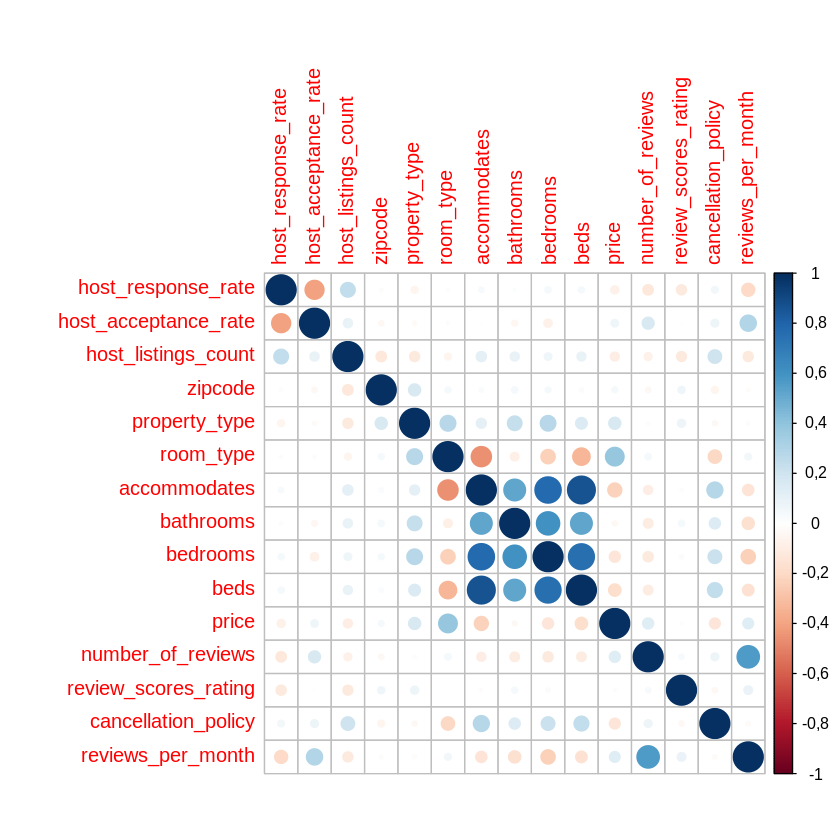

In [49]:
M = cor(df2)
corrplot(M, method = "circle") #plot matrix

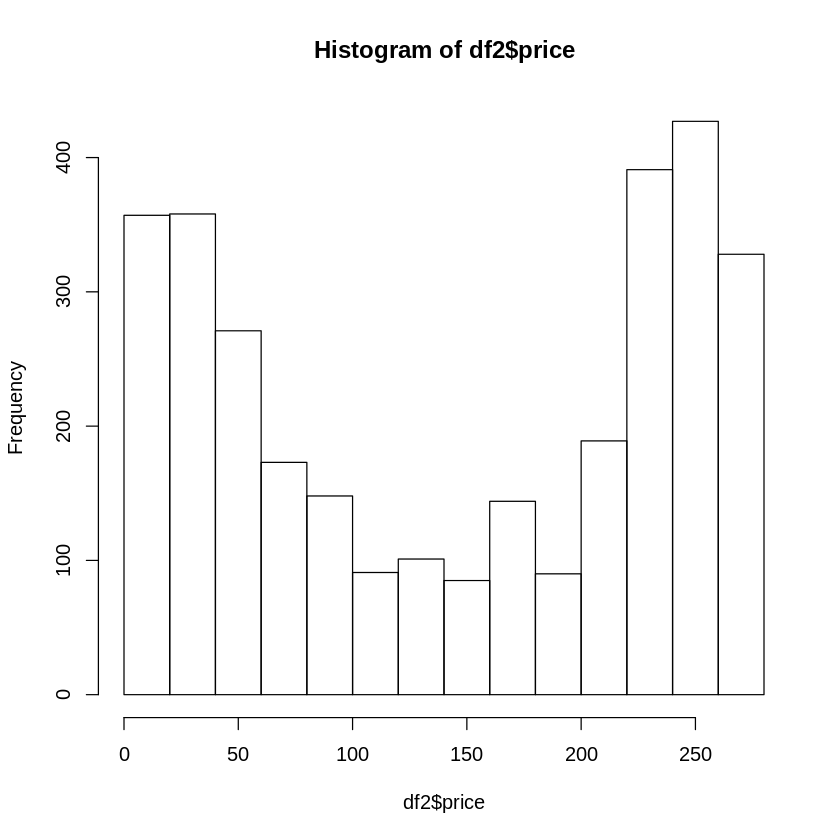

In [50]:
hist(df2$price)

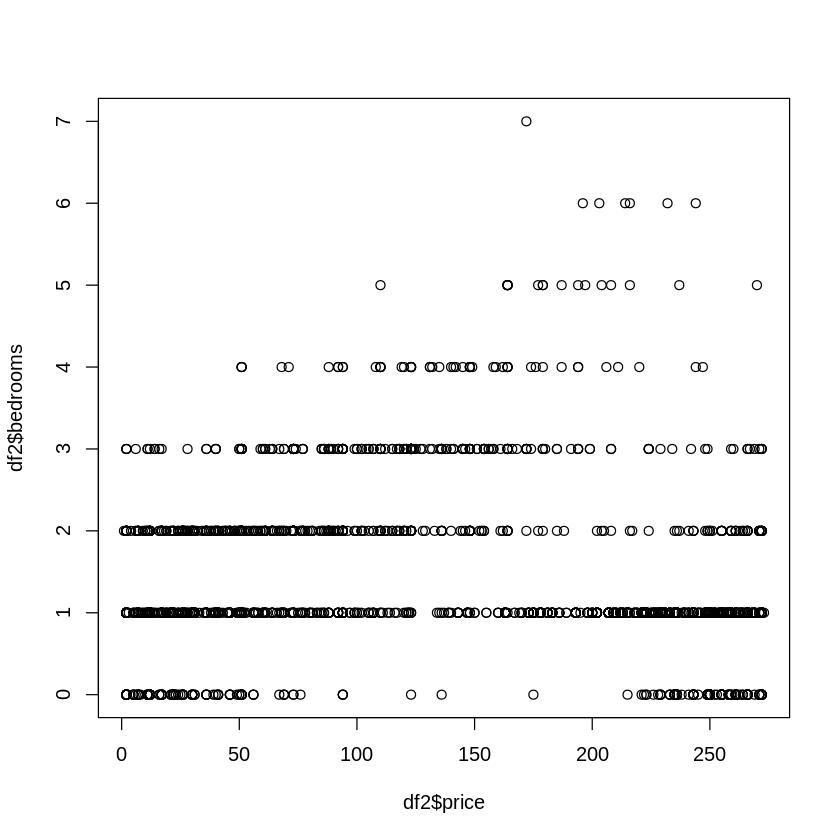

In [51]:
plot(df2$price, df2$bedrooms)

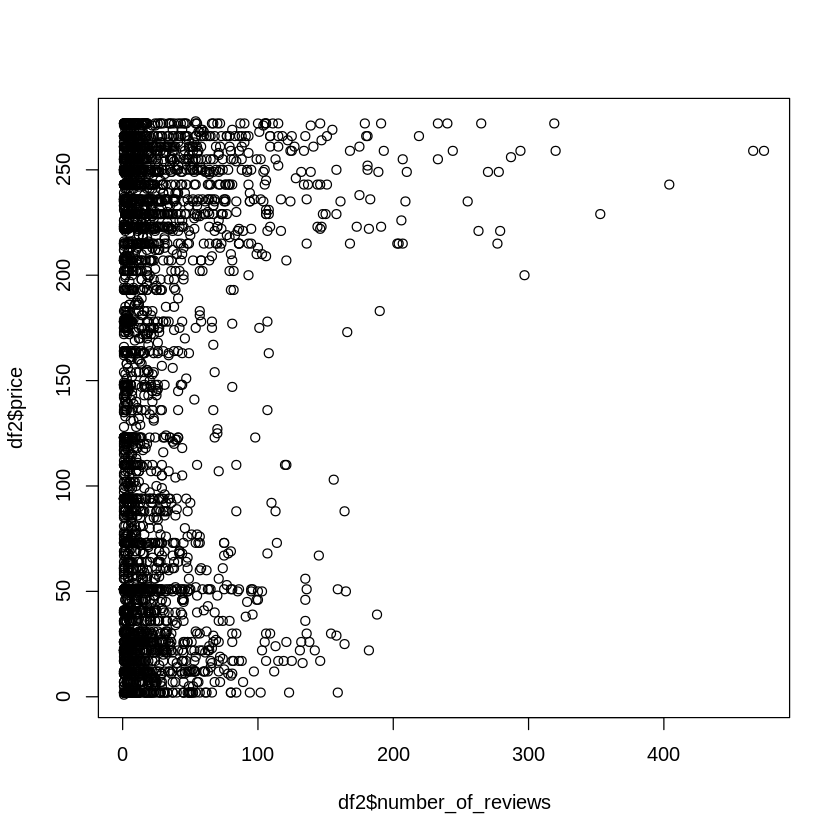

In [52]:
plot(df2$number_of_reviews, df2$price)

In [53]:
require(lattice)

Loading required package: lattice


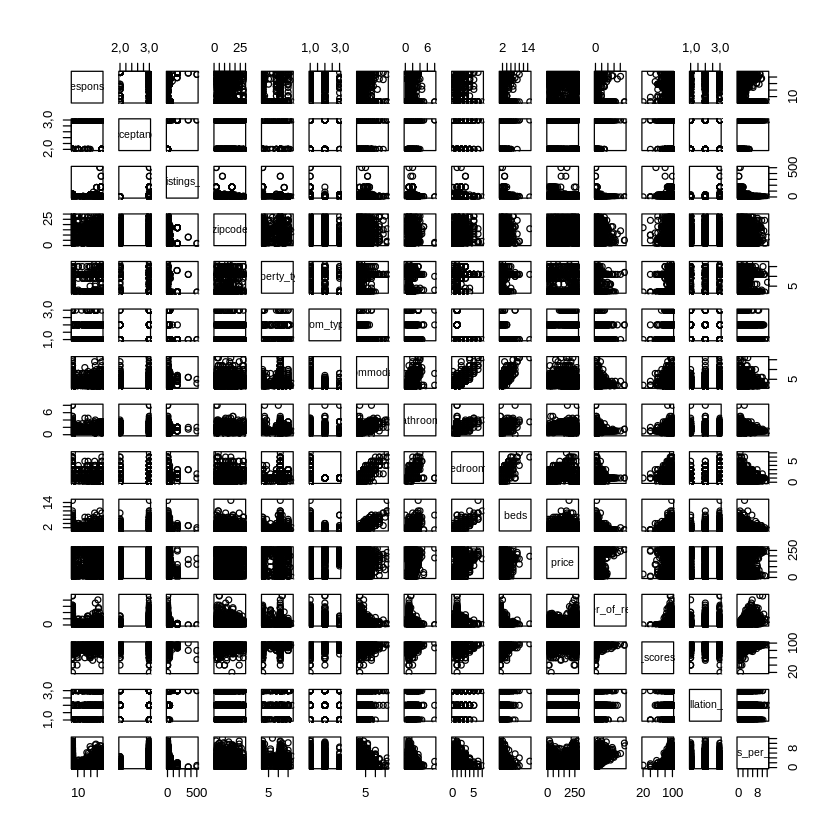

In [54]:
pairs(df2)

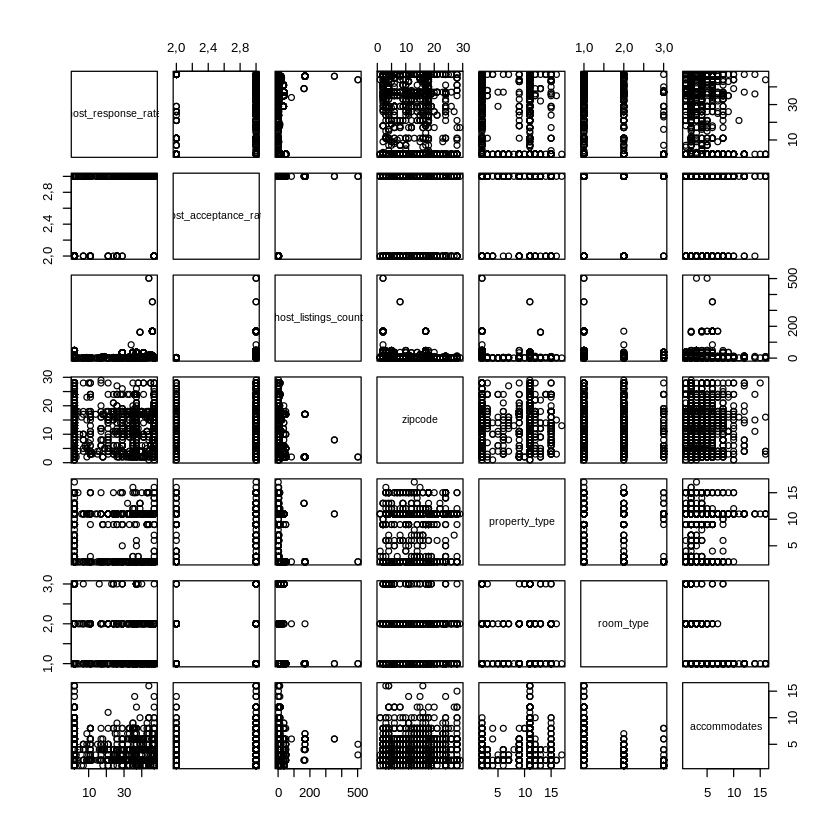

In [55]:
pairs(df2[1:7])

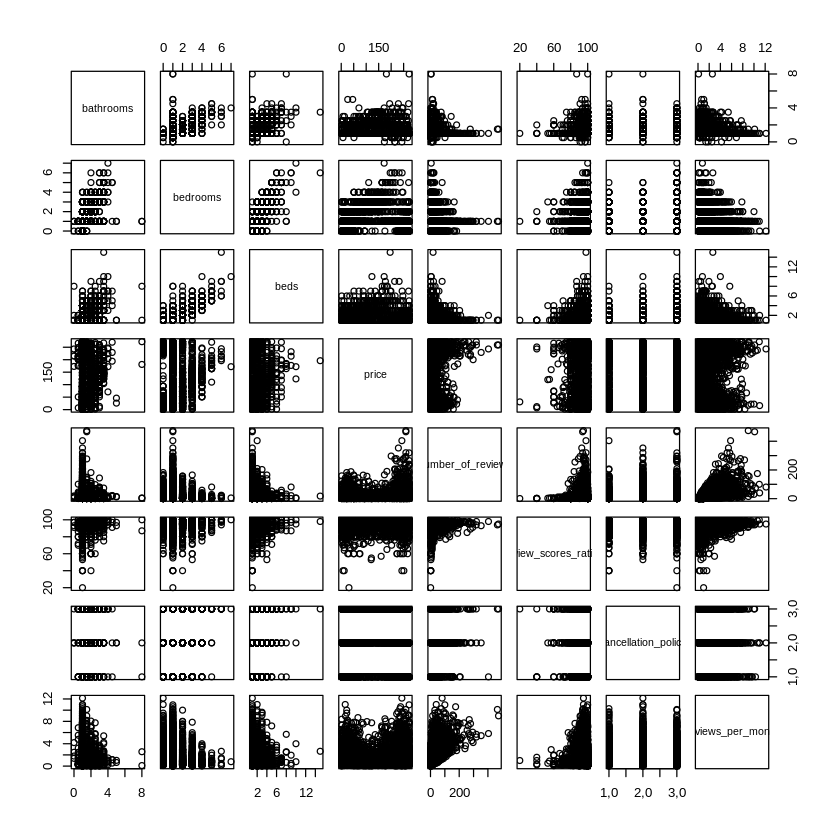

In [56]:
pairs(df2[8:15])

In [57]:
install.packages("ggplot2")            # Packages need to be installed only once
install.packages("GGally")
 
library("ggplot2")                     # Load ggplot2 package
library("GGally") 

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



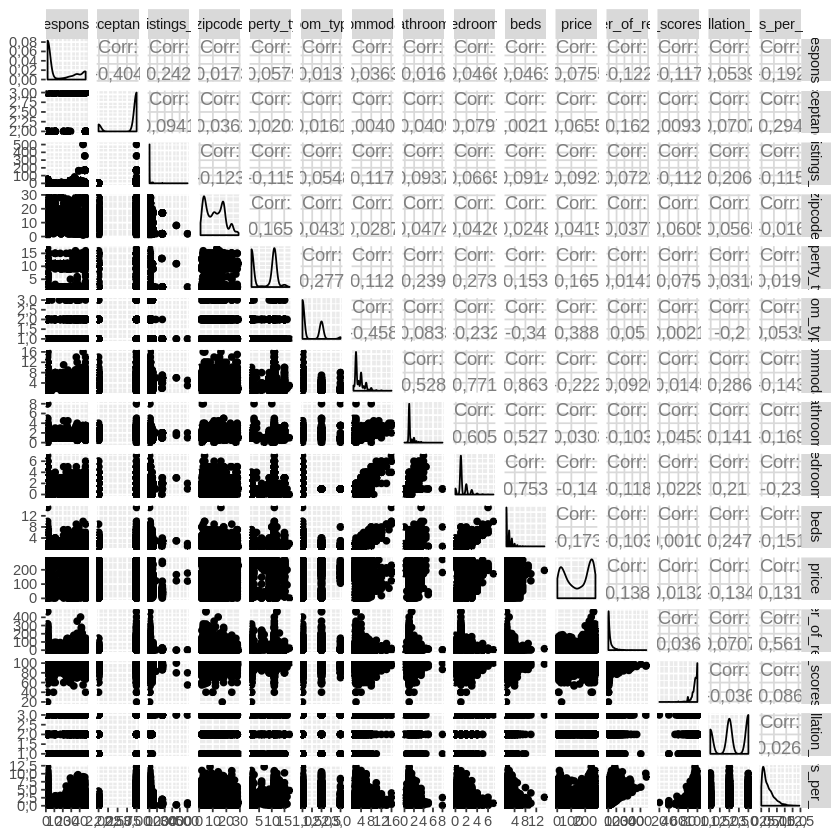

In [58]:
ggpairs(df2) 

# Union con otros datasets

Cruzamos con con el dataset de espacios culturales de tal modo que para aquellos que tengan el mismo zip.code, el precio puede ser mayor.

In [66]:
head(cultural_spaces)

Name                             Phone         
1 Bootstrap Music                                
2 Ghost Gallery                    (206) 832-6063
3 Chihuly Garden and Glass                       
4 Dynamic Sound Service                          
5 Golden Oldies                                  
6 City of Bellevue Arts Commission (425) 452-4105
  URL                                 Square.Feet.Total Neighborhood
1                                      NA                           
2 www.ghostgalleryart.com             900               Capitol Hill
3                                      NA                           
4                                      NA                           
5                                      NA                           
6 www.bellevuewa.gov/arts_program.htm  NA                           
  Organization.Type Dominant.Discipline                      Year.of.Occupation
1                   Studios                                    NA              
2 N                 Visual                                   2010              
3                   Visual                                     NA              
4                   Studios                                    NA              
5                   Music                                      NA              
6                   Arts/Cultrual Administration or Advocacy   NA              
  Rent.vs.Own Age.of.Current.Building ⋯ Organization.Artists Closed.Date
1               NA                    ⋯                                 
2 R           1926                    ⋯                                 
3               NA                    ⋯                                 
4               NA                    ⋯                                 
5               NA                    ⋯                                 
6               NA                    ⋯                                 
  Closed. Address                               Location                  
1  0                                                                      
2  0      504 E Denny Way Seattle WA 98122      (47.6186813, -122.3249251)
3  0      305 Harrison St Seattle WA 98109      (47.6205686, -122.350491) 
4 NA                                                                      
5  0      201 NE 45th St Seattle WA 98105       (47.66116, -122.326927)   
6  0      450 - 110th Ave. NE Bellevue WA 98004 (47.6142449, -122.1934783)
  X2010.Census.Tracts
1 NA                 
2 NA                 
3 NA                 
4 NA                 
5 NA                 
6 NA                 
  Seattle.Police.Department.Micro.Community.Policing.Plan.Areas
1 NA                                                           
2  8                                                           
3 50                                                           
4 NA                                                           
5 61                                                           
6 NA                                                           
  City.Council.Districts SPD.Beats Zip.Codes
1 NA                     NA           NA    
2 NA                      5        18376    
3 NA                     40        18390    
4 NA                     NA           NA    
5 NA                      3        18383    
6 NA                     NA        31848

In [75]:
na.omit(cultural_spaces)

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”

Name Phone URL Square.Feet.Total Neighborhood Organization.Type
     Dominant.Discipline Year.of.Occupation Rent.vs.Own Age.of.Current.Building
     ⋯ Organization.Artists Closed.Date Closed. Address Location
     X2010.Census.Tracts
     Seattle.Police.Department.Micro.Community.Policing.Plan.Areas
     City.Council.Districts SPD.Beats Zip.Codes

In [76]:
class(cultural_spaces)

[1] "data.frame"

In [ ]:
head(df_space)